In [1]:
import LocustFakeEvent
import h5py
import uproot
import matplotlib.pyplot as plt
import numpy as np

# Inputs

In [27]:
working_dir = '../Locust_out'
katydid_config = '../Katydid_LOCUST_may_2019_config.yaml'
locust_config = '../LocustFakeTrack_distribution_choices.json'
sim_name = 'test_fake_event'
min_snr=0.0
snr=20.0
N=4096
SR=100e6
dt = 1.0/SR

# Simulation
LocustFakeEvent.run_simulation simulates a single spectrogram. The result goes in the directory specified by 'working_dir/sim_name' (relative to current dir). The created output files are "simulated_event.root", which contains the true event parameters and "locust_wnoise.egg", which contains the simulated time series. As input it needs the path to the template file for the Locust config. 
The output vars are:
- spec : the image spectrogram
- frequencies: the frequencies
- true_events: the content of the root file as a list of python dictionaries

In [36]:
spec, frequencies, true_events = LocustFakeEvent.run_simulation(working_dir=working_dir, 
                                                                            sim_name=sim_name, 
                                                                            locust_config_path=locust_config, 
                                                                            snr=snr, 
                                                                            min_snr=min_snr, 
                                                                            N=N, SR=SR, fixed_snr=False)

SNR from uniform dist: 0.0 - 20.0

Simulated SNR: 10.195337212449335


Copy locust config to sim path
LocustSim config=../Locust_out/test_fake_event/LocustFakeTrack_distribution_choices.json
	Created: ../Locust_out/test_fake_event/locust_wnoise.egg
	Locust simulation time was 2.991417169570923s
slices and bins 488 4096


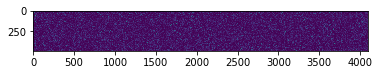

In [34]:
plt.imshow(spec)

# Plot spectrogram

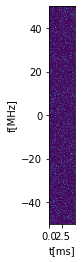

In [4]:
LocustFakeEvent.plot_spectrogram(spec, frequencies, dt, outfile=working_dir+'/'+sim_name+'/spec')

# Katydid analysis
LocustFakeEvent.run_analysis runs an analysis with Katydid. It takes the file "simulated_event.root" located in "working_dir/sim_name" as input file. It also requires the path to the template config file for Katydid. It writes one output file "reconstructed_event.root" to the directory "working_dir/sim_name".
The output var katydid_events contains a list of the tracks that were found. Each entry is a dictionary with track parameters.
The remaining input parameters are the ones which should be scanned, each with the original value as default:
- sigma_threshold is the threshold for the sparse spectrogram
- time_gap_tolerance is the maximum allowed gap in tracks
- frequency_acceptance ?
- trimming_threshold ?
- min_points minimum number of pixels per track
- min_average_nup is the power cut to remove some tracks, should be disabled OR scanned. 0.0 disables it

In [37]:
katydid_events = LocustFakeEvent.run_analysis(working_dir, sim_name, katydid_config)
#LocustFakeEvent.run_analysis(working_dir, sim_name, katydid_config_path, sigma_threshold=4.0,
#                    time_gap_tolerance=1e-4, frequency_acceptance=56e3,
#                    trimming_threshold=6, min_points=3, min_average_nup=0.0)

	Running Katydid...
Katydid -c ../Locust_out/test_fake_event/Katydid_LOCUST_may_2019_config.yaml -e ../Locust_out/test_fake_event/locust_wnoise.egg --rtw-file ../Locust_out/test_fake_event/reconstructed_event.root
	Katydid time was 0.8035776615142822s


## To-do 
Run the simulation N times in a loop. sim_name should depend on the loop iteration. Apply our algorithm and Katydid to the created spectra, both with parameter scans -> ROC curves. Keep in mind that running Locust and Katydid creates real files in addition to the data which is returned in main memory (i.e. the variables in this notebook -- main memory can be cleaned up by resetting the kernel, the files are not deleted by that)! Especially the egg files from Locust can get big. Clean up files from time to time if you don't need them anymore.

In [44]:
print("---------------LOCUST Simulation---------------")
print()
for i in range(len(true_events[0])):
    print("Statistics for track",(i+1))
    print(true_events[0][i])
    print("------------------------------------")
    print()

---------------LOCUST Simulation---------------

Statistics for track 1
{'power': 7.467287997399414e-09, 'pitch_angle': 90.0, 'start_freq': 25909537241.257236, 'start_time': 0.0055076993462400995, 'end_time': 0.005726966119869511, 'track_length': 0.00021926677362941145, 'slope': 0.33409388979224913}
------------------------------------

Statistics for track 2
{'power': 7.467287997399414e-09, 'pitch_angle': 90.0, 'start_freq': 25910612608.18856, 'start_time': 0.005726966119869511, 'end_time': 0.005860246574313989, 'track_length': 0.00013328045444447776, 'slope': 0.32637106080427253}
------------------------------------

Statistics for track 3
{'power': 7.467287997399414e-09, 'pitch_angle': 90.0, 'start_freq': 25911146648.613102, 'start_time': 0.005860246574313989, 'end_time': 0.006276886670196713, 'track_length': 0.00041664009588272377, 'slope': 0.3815486841275449}
------------------------------------

Statistics for track 4
{'power': 7.467287997399414e-09, 'pitch_angle': 90.0, 'start_f

In [46]:
print("---------------KATYDID Analysis---------------")
print()
for i in range(len(katydid_events)):
    print("Statistics for track",(i+1))
    print(katydid_events[i])
    print("------------------------------------")
    print()

---------------KATYDID Analysis---------------

Statistics for track 1
{'start_time': 0.00555008, 'end_time': 0.00567296, 'start_freq': 59549386.16071533, 'end_freq': 59596470.424105845, 'avg_snr': 8.888983298481692}
------------------------------------

Statistics for track 2
{'start_time': 0.00595968, 'end_time': 0.00620544, 'start_freq': 61189488.00223218, 'end_freq': 61278424.94419639, 'avg_snr': 9.916262045620536}
------------------------------------

Statistics for track 3
{'start_time': 0.00632832, 'end_time': 0.00653312, 'start_freq': 62006440.03378374, 'end_freq': 62085620.777027056, 'avg_snr': 12.373055339126955}
------------------------------------

Statistics for track 4
{'start_time': 0.0065740799999999995, 'end_time': 0.0068608, 'start_freq': 63254203.048406824, 'end_freq': 63379863.664215714, 'avg_snr': 9.682119787929489}
------------------------------------

